In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#importing all regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Data Collection & Analylis

In [4]:
df = pd.read_csv("gld_price_data.csv")

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
df.shape

(2290, 6)

In [8]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

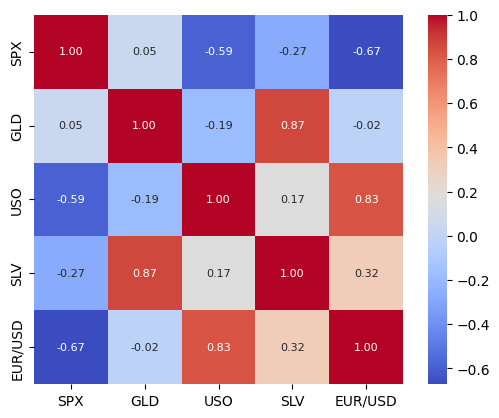

In [11]:
sns.heatmap(df.drop("Date", axis=1).corr(), annot=True, square=True, cmap='coolwarm', cbar=True, fmt=".2f", annot_kws={"size":8} )

<Axes: xlabel='Date', ylabel='GLD'>

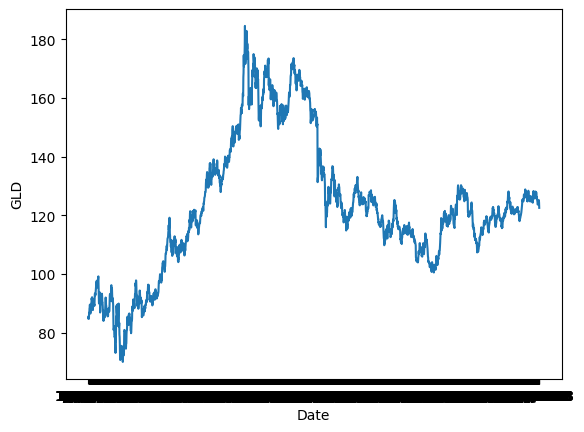

In [12]:
sns.lineplot(x="Date", y="GLD", data=df)

<Axes: xlabel='GLD', ylabel='Density'>

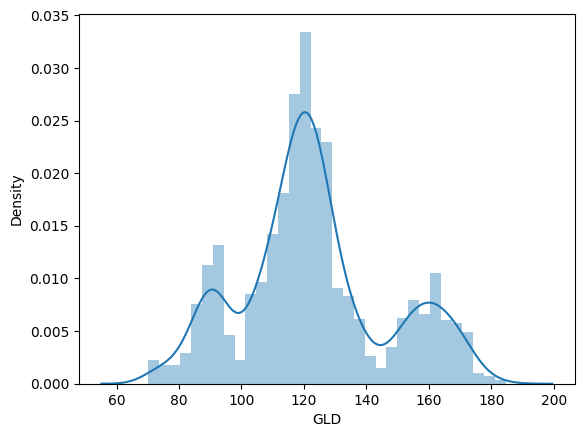

In [13]:
sns.distplot(df["GLD"])

In [14]:
X = df.drop(columns = ["Date", "GLD"], axis=1)
y= df["GLD"]

In [15]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Train Test Split

In [16]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_Train.shape, X_Test.shape)

(2290, 4) (1832, 4) (458, 4)


In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}


In [19]:
for label, model in models.items():
  model.fit(X_Train,y_Train)
  y_pred= model.predict(X_Test)
  print(label, "R2 Score:", round(r2_score(y_Test, y_pred),2))
  print(label, "MSE:", round(mean_squared_error(y_Test, y_pred),2))

Linear Regression R2 Score: 0.87
Linear Regression MSE: 70.79
Decision Tree R2 Score: 0.98
Decision Tree MSE: 8.51
Random Forest R2 Score: 0.99
Random Forest MSE: 5.91
K-Neighbors R2 Score: 0.93
K-Neighbors MSE: 34.86
Support Vector Machine R2 Score: 0.11
Support Vector Machine MSE: 467.35
XGBoost R2 Score: 0.99
XGBoost MSE: 6.65
Gradient Boosting R2 Score: 0.98
Gradient Boosting MSE: 12.43
AdaBoost R2 Score: 0.94
AdaBoost MSE: 32.64
Extra Trees R2 Score: 0.99
Extra Trees MSE: 3.83


Random Forest and Extra Trees and great accuracy with least mean square error. So, we will use them to make prediction


In [21]:
random = RandomForestRegressor()
random.fit(X_Train, y_Train)
extra = ExtraTreesRegressor()
extra.fit(X_Train, y_Train)

ExtraTreesRegressor()

In [24]:
input = [1447.16,78,15,1.47]
array = np.asarray(input)
array_reshape = array.reshape(1,-1)
prediction1 = random.predict(array_reshape)
prediction2 = extra.predict(array_reshape)
print("Random Forest: The Gold price is estimated to be: ", round(prediction1[0],2))
print("ExtraTrees: The Gold price is estimated to be: ", round(prediction2[0],2))

Random Forest: The Gold price is estimated to be:  84.83
ExtraTrees: The Gold price is estimated to be:  85.12


In [25]:
import joblib

In [27]:
joblib.dump(random, "random.pkl")
joblib.dump(extra, "extra.pkl")

['extra.pkl']